In [3]:
import pandas as pd
import numpy as np
import math
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn import preprocessing
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

% matplotlib inline

# Set Random Seed

np.random.seed(42)
np.random.RandomState(42)

RandomState(MT19937) at 0x7F833ECC0570

In [0]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Predictive Model for new patient prediction:

In [0]:
def train(Cancer_models):
  db = pd.read_excel("BreastCandata.xlsx")
  df = pd.DataFrame(db)
  df['Outcome'] = df['Outcome'].apply(lambda x: '1' if x == 'R' else '0')
  df['Outcome'] = pd.to_numeric(df['Outcome'], downcast = "integer")
  X = db.drop(['Outcome', 'ID'], axis = 1)
  y = db['Outcome']
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=42)
  df = pd.DataFrame(X_test)
 
  kf = KFold(n_splits = 5, shuffle = True, random_state = 2)
  result = next(kf.split(db), None)
  sc = preprocessing.StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  Cancer_models[0].append(LogisticRegression().fit(X_train,y_train))
  Cancer_models[1].append(KNeighborsClassifier().fit(X_train,y_train))
  Cancer_models[2].append(RandomForestClassifier().fit(X_train,y_train))
  return Cancer_models

In [0]:
def predict(Cancer_models):
  print('Input: radius_mean	texture_mean	perimeter_mean	area_mean	smoothness_mean	compactness_mean	concavity_mean	concave_points_mean	symmetry_mean	fractal_dimension_mean	radius_std_dev	texture_std_dev	perimeter_std_dev	area_std_dev	smoothness_std_dev	compactness_std_dev	concavity_std_dev	concave_points_std_dev	symmetry_std_dev	fractal_dimension_std_dev	Worst_radius	Worst_texture	Worst_perimeter	Worst_area	Worst_smoothness	Worst_compactness	Worst_concavity	Worst_concave_points	Worst_symmetry	Worst_fractal_dimension	Tumor_Size	Lymph_Node_Status')
  x_pred = list(map(float, input().split()))
  x_pred = np.expand_dims(x_pred, axis = 0)
  predict1 = Cancer_models[0][1].predict(x_pred)
  predict2 = Cancer_models[1][1].predict(x_pred)
  predict3 = Cancer_models[2][1].predict(x_pred)
  print('LR: ', predict1)
  print('KNN: ', predict2)
  print('RF: ', predict3)

In [0]:
def BreastCancerA(f):
  print('1: Train Again, 2: Load Trained Model')
  Cancer_models = [["LogisticRegression"],
                ["KNeighborsClassifier"],
                ["RandomForestClassifier"]]
  # f = int(input())
  if(f == 1):
    Cancer_models = train(Cancer_models)
  elif(f == 2):
    model1 = pickle.load(open('BCModel.sav', 'rb'))
    model2 = pickle.load(open('BCModel.sav', 'rb'))
    model3 = pickle.load(open('BCModel.sav', 'rb'))
    Cancer_models[0].append(model1)
    Cancer_models[1].append(model2)
    Cancer_models[2].append(model3)
  else:
    print('Incorrect input!')
  predict(Cancer_models)

In [31]:
BreastCancerA(1)
# input: 15.30	25.27	102.4	732.4	0.10820	0.1697	0.16830	0.08751	0.1926	0.06540	0.4390	1.0120	3.498	43.50	0.005233	0.03057	0.03576	0.01083	0.01768	0.002967	20.27	36.71	149.30	1269.0	0.1641	0.6110	0.6335	0.2024	0.4027	0.09876	2.0	0

1: Train Again, 2: Load Trained Model
Input: radius_mean	texture_mean	perimeter_mean	area_mean	smoothness_mean	compactness_mean	concavity_mean	concave_points_mean	symmetry_mean	fractal_dimension_mean	radius_std_dev	texture_std_dev	perimeter_std_dev	area_std_dev	smoothness_std_dev	compactness_std_dev	concavity_std_dev	concave_points_std_dev	symmetry_std_dev	fractal_dimension_std_dev	Worst_radius	Worst_texture	Worst_perimeter	Worst_area	Worst_smoothness	Worst_compactness	Worst_concavity	Worst_concave_points	Worst_symmetry	Worst_fractal_dimension	Tumor_Size	Lymph_Node_Status
20.29	14.34	135.10	1297.0	0.10030	0.1328	0.1980	0.10430	0.1809	0.05883	0.7572	0.7813	5.438	94.44	0.011490	0.02461	0.05688	0.018850	0.01756	0.005115	22.54	16.67	152.20	1575.0	0.1374	0.2050	0.4000	0.12 0.1625	0.2364	0.07678	3.5	0
LR:  [1]
KNN:  [0]
RF:  [0]


In [0]:
# def BreastCancerMain():
#   # print('1: Task A, 2: Task B')
#   # f = int(input())
#   # if(f == 1):
#   #   BreastCancerA()
#   # elif(f == 2):
#   #   BreastCancerB()
#   # else:
#   #   print('Incorrect input!')

___________________
## Main Task:

In [32]:
db= pd.read_excel("BreastCandata.xlsx")
db.head(6)

,ID,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,perimeter_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0
5,843786,R,77,12.75,15.29,84.60,502.7,0.11890,0.1569,0.1664,0.07666,0.1995,0.07164,0.3877,0.7402,2.999,30.85,0.007775,0.02987,0.04561,0.013570,0.01774,0.005114,15.51,20.37,107.30,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0


In [33]:
db.tail()

,ID,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,perimeter_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
193,942640,N,10,22.52,21.92,146.9,1597.0,0.07592,0.09162,0.06862,0.06367,0.1728,0.05262,1.3740,2.3120,9.938,192.40,0.004422,0.02679,0.02433,0.020360,0.02486,0.003922,24.67,24.81,162.1,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
194,943471,N,8,15.44,31.18,101.0,740.4,0.09399,0.10620,0.13750,0.06500,0.1735,0.06105,0.3235,1.8390,1.971,32.61,0.006178,0.02088,0.02834,0.010790,0.02122,0.003168,17.34,41.48,112.6,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
195,94547,N,12,17.17,29.19,110.0,915.3,0.08952,0.06655,0.06583,0.05068,0.1793,0.05392,0.6101,1.4250,3.827,63.02,0.006890,0.01556,0.03155,0.009714,0.02734,0.001377,20.76,36.66,132.5,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
196,947204,R,3,21.42,22.84,145.0,1440.0,0.10700,0.19390,0.23800,0.13180,0.1884,0.06472,1.0850,0.8469,8.308,142.50,0.006831,0.03541,0.04948,0.017700,0.01481,0.003979,28.34,27.98,198.3,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,7
197,947489,N,6,16.70,28.13,110.3,885.4,0.08896,0.11310,0.10120,0.04989,0.1890,0.06035,0.6052,1.2350,4.243,63.91,0.007767,0.02631,0.03957,0.014110,0.01957,0.003606,19.74,34.92,128.8,1213.0,0.13300,0.2808,0.3455,0.13170,0.3035,0.08036,3.5,0


In [34]:
db.describe()

,ID,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,perimeter_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
count,1.980000e+02,198.000000,198.000000,198.00000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,1.990469e+06,46.732323,17.412323,22.27601,114.856566,970.040909,0.102681,0.142648,0.156243,0.086776,0.192754,0.062706,0.603346,1.264450,4.255394,70.228737,0.006762,0.031199,0.040750,0.015099,0.020555,0.003987,21.021818,30.139091,140.347778,1404.958586,0.143921,0.365102,0.436685,0.178778,0.323404,0.090828,2.847475,3.181818
std,2.889025e+06,34.462870,3.161676,4.29829,21.383402,352.149215,0.012522,0.049898,0.070572,0.033877,0.027437,0.007240,0.310112,0.526467,2.194128,47.982255,0.002974,0.017613,0.020869,0.005504,0.009578,0.001938,4.242997,6.017777,28.892279,586.006972,0.022004,0.163965,0.173625,0.045181,0.075161,0.021172,1.937964,5.444438
min,8.423000e+03,1.000000,10.950000,10.38000,71.900000,361.600000,0.074970,0.046050,0.023980,0.020310,0.130800,0.050250,0.193800,0.362100,1.153000,13.990000,0.002667,0.007347,0.010940,0.005174,0.007882,0.001087,12.840000,16.670000,85.100000,508.100000,0.081910,0.051310,0.023980,0.028990,0.156500,0.055040,0.400000,0.000000
25%,8.557452e+05,14.000000,15.052500,19.41250,98.160000,702.525000,0.093900,0.110200,0.106850,0.063670,0.174075,0.056718,0.388200,0.921300,2.742500,35.365000,0.005001,0.019803,0.026810,0.011422,0.014795,0.002748,17.632500,26.210000,118.075000,947.275000,0.129325,0.248700,0.322150,0.152650,0.275950,0.076577,1.500000,0.000000
50%,8.863390e+05,39.500000,17.290000,21.75000,113.700000,929.100000,0.101900,0.131750,0.151350,0.086075,0.189350,0.061715,0.533250,1.168500,3.767000,58.455000,0.006193,0.027880,0.036910,0.014175,0.017905,0.003719,20.525000,30.135000,136.500000,1295.000000,0.141850,0.351300,0.402350,0.179250,0.310300,0.086890,2.500000,1.000000
75%,9.279958e+05,72.750000,19.580000,24.65500,129.650000,1193.500000,0.110975,0.172200,0.200500,0.103925,0.209325,0.066715,0.750900,1.463250,5.212750,92.477500,0.007973,0.038335,0.048970,0.017665,0.022880,0.004630,23.730000,33.555000,159.875000,1694.250000,0.154875,0.423675,0.541050,0.207125,0.358800,0.101375,3.500000,4.000000
max,9.411300e+06,125.000000,27.220000,39.28000,182.100000,2250.000000,0.144700,0.311400,0.426800,0.201200,0.304000,0.097440,1.819000,3.503000,13.280000,316.000000,0.031130,0.135400,0.143800,0.039270,0.060410,0.012560,35.130000,49.540000,232.200000,3903.000000,0.222600,1.058000,1.170000,0.290300,0.663800,0.207500,10.000000,27.000000


________________________________________________________________________________________________________________________________________________
# Task A
* Building a classifier to predict the outcome of a new patient.


### Data-Preprocessing

In [35]:
db.isnull().sum()

ID                           0
Outcome                      0
Time                         0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave_points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_std_dev               0
texture_std_dev              0
perimeter_std_dev            0
area_std_dev                 0
smoothness_std_dev           0
compactness_std_dev          0
concavity_std_dev            0
concave_points_std_dev       0
symmetry_std_dev             0
fractal_dimension_std_dev    0
Worst_radius                 0
Worst_texture                0
Worst_perimeter              0
Worst_area                   0
Worst_smoothness             0
Worst_compactness            0
Worst_concavity              0
Worst_concave_points         0
Worst_symmetry               0
Worst_fr

In [0]:
df = pd.DataFrame(db)
# from sklearn.preprocessing import OneHotEncoder
# # creating instance of one-hot-encoder
# enc = OneHotEncoder(handle_unknown='ignore')

# enc_df = pd.DataFrame(enc.fit_transform(df[['Outcome']]).toarray())

# df = df.join(enc_df)
# df

In [37]:
df['Outcome'] = df['Outcome'].apply(lambda x: '1' if x == 'R' else '0')
df

,ID,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,perimeter_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,119513,0,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5
1,8423,0,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
2,842517,0,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
3,843483,0,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
4,843584,1,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,942640,0,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,0.1728,0.05262,1.3740,2.3120,9.938,192.40,0.004422,0.02679,0.02433,0.020360,0.02486,0.003922,24.67,24.81,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
194,943471,0,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,0.1735,0.06105,0.3235,1.8390,1.971,32.61,0.006178,0.02088,0.02834,0.010790,0.02122,0.003168,17.34,41.48,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
195,94547,0,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,0.1793,0.05392,0.6101,1.4250,3.827,63.02,0.006890,0.01556,0.03155,0.009714,0.02734,0.001377,20.76,36.66,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
196,947204,1,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,0.13180,0.1884,0.06472,1.0850,0.8469,8.308,142.50,0.006831,0.03541,0.04948,0.017700,0.01481,0.003979,28.34,27.98,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,7


In [0]:
df['Outcome'] = pd.to_numeric(df['Outcome'], downcast = "integer")

In [39]:
df

,ID,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,perimeter_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,119513,0,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5
1,8423,0,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
2,842517,0,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
3,843483,0,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
4,843584,1,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,942640,0,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,0.1728,0.05262,1.3740,2.3120,9.938,192.40,0.004422,0.02679,0.02433,0.020360,0.02486,0.003922,24.67,24.81,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
194,943471,0,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,0.1735,0.06105,0.3235,1.8390,1.971,32.61,0.006178,0.02088,0.02834,0.010790,0.02122,0.003168,17.34,41.48,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
195,94547,0,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,0.1793,0.05392,0.6101,1.4250,3.827,63.02,0.006890,0.01556,0.03155,0.009714,0.02734,0.001377,20.76,36.66,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
196,947204,1,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,0.13180,0.1884,0.06472,1.0850,0.8469,8.308,142.50,0.006831,0.03541,0.04948,0.017700,0.01481,0.003979,28.34,27.98,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,7


In [0]:
# db['Outcome'] = db['Outcome'].apply(lambda x:'1' if x == 'R' else '0')

# db.head(20)

In [0]:
# df = pd.DataFrame(db)
# df

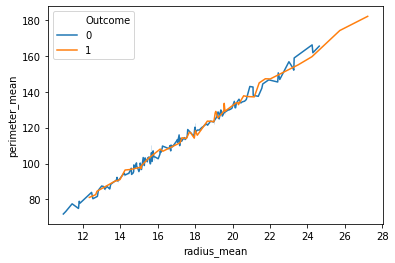

In [42]:
sns.lineplot(x=db["radius_mean"],y=db["perimeter_mean"], hue=db["Outcome"])

In [0]:
from tqdm import tqdm

Ploting for types of Diagnosis:
* Cancer Reccursive(1)  and Non-Reccursive(0) 

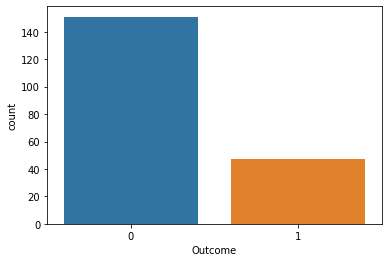

In [44]:
#Countplot
sns.countplot(db['Outcome'])

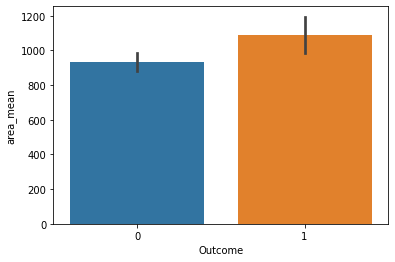

In [45]:
# Barplot: diagnosis vs area_mean.
sns.barplot(db['Outcome'],db['area_mean'])

___
scatterplot: that shows the charactetstic of how much one variable is affected by another, as far as correlation is concerned.

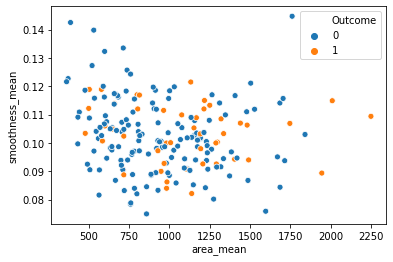

In [46]:
sns.scatterplot(x = db['area_mean'],y= db['smoothness_mean'],hue=db['Outcome'])

___________________________________________

##Feature Scalling and Training

In [47]:
df

,ID,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,perimeter_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,119513,0,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5
1,8423,0,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
2,842517,0,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
3,843483,0,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
4,843584,1,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,942640,0,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,0.1728,0.05262,1.3740,2.3120,9.938,192.40,0.004422,0.02679,0.02433,0.020360,0.02486,0.003922,24.67,24.81,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
194,943471,0,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,0.1735,0.06105,0.3235,1.8390,1.971,32.61,0.006178,0.02088,0.02834,0.010790,0.02122,0.003168,17.34,41.48,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
195,94547,0,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,0.1793,0.05392,0.6101,1.4250,3.827,63.02,0.006890,0.01556,0.03155,0.009714,0.02734,0.001377,20.76,36.66,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
196,947204,1,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,0.13180,0.1884,0.06472,1.0850,0.8469,8.308,142.50,0.006831,0.03541,0.04948,0.017700,0.01481,0.003979,28.34,27.98,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,7


In [0]:
X = db.drop(['Outcome','ID'], axis = 1)
y = db['Outcome']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=42)
# x_train, _test = train_test_split(a, test_size=0.40, random_state=0)


In [49]:
X_train.head()

,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,perimeter_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
22,52,15.30,25.27,102.4,732.4,0.10820,0.1697,0.16830,0.08751,0.1926,0.06540,0.4390,1.0120,3.498,43.50,0.005233,0.03057,0.03576,0.01083,0.01768,0.002967,20.27,36.71,149.30,1269.0,0.1641,0.6110,0.6335,0.2024,0.4027,0.09876,2.0,0
148,13,17.27,25.42,112.4,928.8,0.08331,0.1109,0.12040,0.05736,0.1467,0.05407,0.5100,1.6790,3.283,58.38,0.008109,0.04308,0.04942,0.01742,0.01594,0.003739,20.38,35.46,132.80,1284.0,0.1436,0.4122,0.5036,0.1739,0.2500,0.07944,9.0,0
146,47,18.82,21.97,123.7,1110.0,0.10180,0.1389,0.15940,0.08744,0.1943,0.06132,0.8191,1.9310,4.493,103.90,0.008074,0.04088,0.05321,0.01834,0.02383,0.004515,22.66,30.93,145.30,1603.0,0.1390,0.3463,0.3912,0.1708,0.3007,0.08314,1.0,0
33,99,10.95,21.35,71.9,371.1,0.12270,0.1218,0.10440,0.05669,0.1895,0.06870,0.2366,1.4280,1.822,16.97,0.008064,0.01764,0.02595,0.01037,0.01357,0.003040,12.84,35.34,87.22,514.0,0.1909,0.2698,0.4023,0.1424,0.2964,0.09606,2.7,0
11,125,15.78,17.89,103.6,781.0,0.09710,0.1292,0.09954,0.06606,0.1842,0.06082,0.5058,0.9849,3.564,54.16,0.005771,0.04061,0.02791,0.01282,0.02008,0.004144,20.42,27.28,136.50,1299.0,0.1396,0.5609,0.3965,0.1810,0.3792,0.10480,1.4,0


In [50]:
X_test.head()
# from sklearn.preprocessing import LabelBinarizer

# encoder = LabelBinarizer()
# Y = encoder.fit_transform(X_train)

,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,perimeter_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
65,100,16.11,18.05,105.1,813.0,0.09721,0.11370,0.09447,0.05943,0.1861,0.06248,0.7049,1.3320,4.533,74.08,0.006770,0.01938,0.03067,0.011670,0.01875,0.003434,19.92,25.27,129.0,1233.0,0.1314,0.2236,0.2802,0.12160,0.2792,0.08158,1.5,1
114,5,21.75,20.99,147.3,1491.0,0.09401,0.19610,0.21950,0.10880,0.1721,0.06194,1.1670,1.3520,8.867,156.80,0.005687,0.04960,0.06329,0.015610,0.01924,0.004614,28.19,28.18,195.9,2384.0,0.1272,0.4725,0.5807,0.18410,0.2833,0.08858,2.5,11
16,20,15.34,14.26,102.5,704.4,0.10730,0.21350,0.20770,0.09756,0.2521,0.07032,0.4388,0.7096,3.384,44.91,0.006789,0.05328,0.06446,0.022520,0.03672,0.004394,18.07,19.08,125.1,980.9,0.1390,0.5954,0.6305,0.23930,0.4667,0.09946,1.3,0
141,57,17.99,20.66,117.8,991.7,0.10360,0.13040,0.12010,0.08824,0.1992,0.06069,0.4537,0.8733,3.061,49.81,0.007231,0.02772,0.02509,0.014800,0.01414,0.003336,21.08,25.41,138.1,1349.0,0.1482,0.3735,0.3301,0.19740,0.3060,0.08503,3.0,3
156,36,16.69,20.20,107.1,857.6,0.07497,0.07112,0.03649,0.02307,0.1846,0.05325,0.2473,0.5679,1.775,22.95,0.002667,0.01446,0.01423,0.005297,0.01961,0.001700,19.18,26.56,127.3,1084.0,0.1009,0.2920,0.2477,0.08737,0.4677,0.07623,2.5,0


In [0]:
# Saving test data
df = pd.DataFrame(X_test)
df.to_excel('testdata.xlsx')


Building three types of classifier model:
* Logistic Regression
* KNN
* Random Forest


In [51]:
y_test

65     0
114    1
16     0
141    0
156    0
      ..
135    1
195    0
132    1
36     0
122    0
Name: Outcome, Length: 80, dtype: int8

In [52]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
result = next(kf.split(db), None)
print (result)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,  10,  11,  12,  13,
        14,  17,  20,  21,  22,  23,  25,  26,  27,  28,  29,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  46,
        47,  48,  49,  50,  51,  52,  53,  54,  57,  58,  59,  61,  62,
        63,  64,  66,  67,  70,  71,  72,  74,  75,  77,  78,  79,  80,
        81,  83,  84,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 116, 118, 120, 121, 122, 123, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 142, 143, 144, 145,
       146, 148, 149, 151, 152, 153, 154, 155, 157, 159, 160, 162, 164,
       165, 166, 168, 169, 170, 172, 173, 174, 176, 177, 178, 179, 180,
       181, 182, 183, 184, 185, 186, 188, 189, 190, 192, 193, 194, 195,
       196, 197]), array([  9,  15,  16,  18,  19,  24,  30,  45,  55,  56,  60,  65,  68,
        69,  73,  76,  82,  85,  96, 113, 11

In [0]:



sc = preprocessing.StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
Cancer_models = [["LogisticRegression",LogisticRegression()],
                ["KNeighborsClassifier",KNeighborsClassifier()],
                ["RandomForestClassifier",RandomForestClassifier()]]

In [0]:
acc = []
for i in Cancer_models:
  log = i[1]
  log.fit(X_train,y_train)
  predict = log.predict(X_test)
  acc.append([i[0],accuracy_score(predict,y_test)*100.0])
   

In [0]:
main_score = pd.DataFrame(acc)
main_score.columns = ["Model","Score"]

In [57]:
print("Accuracy Scores:")
main_score

Accuracy Scores:


,Model,Score
0,LogisticRegression,76.25
1,KNeighborsClassifier,82.50
2,RandomForestClassifier,86.25


Acordiing to the above classification results, Random Forest has highest Accuracy of 86.25%

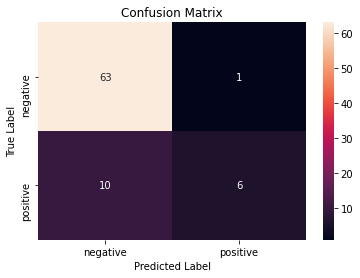

In [58]:
conf_mat = confusion_matrix(y_test, predict)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [59]:

df

,negative,positive
negative,63,1
positive,10,6


In [0]:
import pickle
Saved_model = 'BCModel.sav'
pickle.dump(Cancer_models,open(Saved_model,'wb'))


____________________________________________________________________
_________________
# Task B

## Regression model for all Reccurance Time

In [0]:
reg_data = db.loc[db['Outcome'] == 1]

In [62]:
reg_data.head(7)

,ID,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,perimeter_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
4,843584,1,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0
5,843786,1,77,12.75,15.29,84.60,502.7,0.11890,0.1569,0.16640,0.07666,0.1995,0.07164,0.3877,0.7402,2.999,30.85,0.007775,0.02987,0.04561,0.01357,0.01774,0.005114,15.51,20.37,107.3,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0
7,844582,1,77,13.71,20.83,90.20,577.9,0.11890,0.1645,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,4.0,10
13,847990,1,36,14.54,27.54,96.73,658.8,0.11390,0.1595,0.16390,0.07364,0.2303,0.07077,0.3700,1.0330,2.879,32.55,0.005607,0.04240,0.04741,0.01090,0.01857,0.005466,17.46,37.13,124.1,943.2,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410,6.0,6
15,848620,1,10,16.13,20.68,108.10,798.8,0.11700,0.2022,0.17220,0.10280,0.2164,0.07356,0.5692,1.0730,3.854,54.18,0.007026,0.02501,0.03188,0.01297,0.01689,0.004142,20.96,31.48,136.8,1315.0,0.1789,0.4233,0.4784,0.2073,0.3706,0.11420,3.0,1
17,851509,1,10,21.16,23.04,137.20,1404.0,0.09428,0.1022,0.10970,0.08632,0.1769,0.05278,0.6917,1.1270,4.303,93.99,0.004728,0.01259,0.01715,0.01038,0.01083,0.001987,29.17,35.59,188.0,2615.0,0.1401,0.2600,0.3155,0.2009,0.2822,0.07526,4.0,1
34,855625,1,9,19.07,24.81,128.30,1104.0,0.09081,0.2190,0.21070,0.09961,0.2310,0.06343,0.9811,1.6660,8.830,104.90,0.006548,0.10060,0.09723,0.02638,0.05333,0.007646,24.09,33.17,177.4,1651.0,0.1247,0.7444,0.7242,0.2493,0.4670,0.10380,2.3,0


In [0]:

X = reg_data.drop(['Time', 'ID'], axis=1)
y = reg_data['Time']

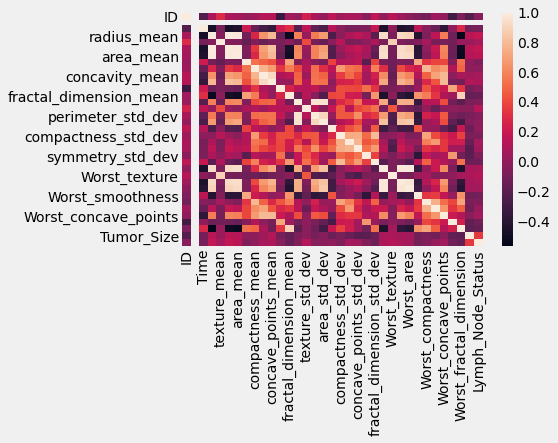

In [80]:
cor = reg_data.corr()
sns.heatmap(cor)

Applying PCA for feature extraction:

In [81]:
# drop_l = ['texture_Mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'smoothness_mean', 
#              'concavity_mean', 'symmetry_mean', 'radius_E','Perimeter_SE', 'Area_SE', 'Texture_SE', 'Compactness_SE',
#              'Smoothness_SE', 'Concavity_SE', 'Concave_Points_SE', 'Fractal_Dimension_SE',
#              'Symmetry_SE','Area_Worst','Perimeter_Worst','Compactness_Worst', 'Concavity_Worst',
#              'Fractal_Dimension_Worst', 'Symmetry_Worst','Concave_Points_Worst','Texture_Worst','Lymph_Node_Status', 'Tumor_Size']

drop_l = ['radius_mean','texture_mean',	'perimeter_mean',	'area_mean',	'smoothness_mean',	'compactness_mean',	'concavity_mean',
          'concave_points_mean',	'symmetry_mean',	'fractal_dimension_mean',	'radius_std_dev',	'texture_std_dev',	'perimeter_std_dev',	'area_std_dev',	
          'smoothness_std_dev',	'compactness_std_dev',	'concavity_std_dev',	'concave_points_std_dev',	'symmetry_std_dev',	
          'fractal_dimension_std_dev',	'Worst_radius',	'Worst_texture',	'Worst_perimeter',	'Worst_area',	'Worst_smoothness',	'Worst_compactness',	
          'Worst_concavity',	'Worst_concave_points',	'Worst_symmetry', 'Worst_fractal_dimension',	'Tumor_Size',	'Lymph_Node_Status']
feature_data = reg_data.drop(drop_l, axis = 1 )
feature_data.head()

,ID,Outcome,Time
4,843584,1,27
5,843786,1,77
7,844582,1,77
13,847990,1,36
15,848620,1,10


In [0]:
from sklearn_pandas import DataFrameMapper
from sklearn import linear_model
# pop = feature_data.drop('Time',axis=1)
# labels = feature_data['Time']
labels = feature_data.pop('Time')
mapper = DataFrameMapper([(feature_data.columns, StandardScaler())])
scaled_features = mapper.fit_transform(feature_data.copy(), 4)
scaled_features_df = pd.DataFrame(scaled_features, index=feature_data.index, columns=feature_data.columns)


In [0]:
from sklearn.metrics import mean_squared_error
def build_and_evaluate_model(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)
    print('Coefficients: \n', regr.coef_)
    print("\n Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    print("\n The labels: \n", np.array(y_test).astype(int))
    print("\n The predicted values are: \n", y_pred.astype(int))

In [84]:
build_and_evaluate_model(feature_data, labels)

Coefficients: 
 [-1.76168893e-06  0.00000000e+00]

 Mean squared error: 266.72

 The labels: 
 [ 5  9 37  7 39  1 26  8 10 12]

 The predicted values are: 
 [14 14 29 28 29 28 29 29 29 29]


In [0]:
import statsmodels.api as sm
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame( data = principalComponents
          , columns = ['PC1', 'PC2','PC3'])


In [0]:
final_Df = pd.concat([principalDf, reg_data[['Time']]], axis = 1)

In [94]:
principalDf
pdf = abs(principalDf)
pdf.head()

,PC1,PC2,PC3
0,302.461504,186.030061,11.210890
1,740.113101,37.992622,18.308201
2,561.047502,10.054966,11.232503
3,478.640495,54.813788,3.049412
4,89.663392,30.452428,0.446644


In [95]:
final_Df = final_Df.fillna(final_Df.mean())
final_Df = abs(final_Df)
final_Df.head()


,PC1,PC2,PC3,Time
0,302.461504,186.030061,11.210890,25.085106
1,740.113101,37.992622,18.308201,25.085106
2,561.047502,10.054966,11.232503,25.085106
3,478.640495,54.813788,3.049412,25.085106
4,89.663392,30.452428,0.446644,27.000000


In [96]:
X = np.column_stack((final_Df['PC1'], final_Df['PC2'],final_Df['PC3']))
y = final_Df['Time']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.445
Date:                Tue, 05 May 2020   Prob (F-statistic):              0.234
Time:                        23:33:51   Log-Likelihood:                -438.64
No. Observations:                 107   AIC:                             885.3
Df Residuals:                     103   BIC:                             896.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.4075      2.161     10.369      0.0

Regression Coefficients: 
 [-1.42620815e-05  5.49608858e-02  6.02919923e-01]

Variance score: 0.2094875294964349



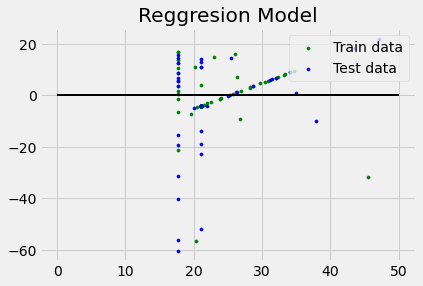

In [97]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets, linear_model, metrics 

X = np.column_stack((final_Df['PC1'], final_Df['PC2'],final_Df['PC3']))
y = final_Df['Time']

# defining feature matrix(X) and response vector(y) 

# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, 
													random_state=1) 

# create linear regression object 
reg = linear_model.LinearRegression() 

reg.fit(X_train, y_train) 

print('Regression Coefficients: \n', reg.coef_) 

print('\nVariance score: {}\n'.format(abs(reg.score(X_test, y_test)))) 


plt.style.use('fivethirtyeight') 


plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, 
			color = "green", s = 10, label = 'Train data') 

## plotting regression in test data 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, 
			color = "blue", s = 10, label = 'Test data') 

## plotting line for zero regression points
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 

## plotting legend 
plt.legend(loc = 'upper right') 

## plot title 
plt.title("Reggresion Model") 

## function to show plot 
plt.show() 
